In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log,sqrt
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
mails = pd.read_csv('spam.csv',encoding = 'latin-1')

mails.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
mails.dropna(axis = 1,inplace = True)
mails.rename(index = str , columns = {'v2':'message','v1':'label'},inplace = True)
mails = mails[['message','label']]
mails.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [12]:
def lab_encoder(s):

    
    if s  == 'ham':
        return 1
    else:
        return 0
        
     
    

In [13]:
encode_label = []
for i in mails['label']:
    
    
    encode_label.append(lab_encoder(i))

    
    
encode_label[:5]    

[1, 1, 0, 1, 1]

In [14]:
mails['elabel'] = encode_label

mails.head()

,message,label,elabel
0,"Go until jurong point, crazy.. Available only ...",ham,1
1,Ok lar... Joking wif u oni...,ham,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,0
3,U dun say so early hor... U c already then say...,ham,1
4,"Nah I don't think he goes to usf, he lives aro...",ham,1


In [15]:
#train and test split

totalMails = mails['message'].shape[0]
print('totalmails',totalMails)
trainIndex,testIndex = list(),list()

for i in range(totalMails):
    
    if np.random.uniform(0,1) < 0.75:
        
        trainIndex += [i]
    
    else:
        
        testIndex += [i]
        
trainData = mails.iloc[trainIndex]        
testData = mails.iloc[testIndex]    
testData.head()

totalmails 5572


,message,label,elabel
1,Ok lar... Joking wif u oni...,ham,1
10,I'm gonna be home soon and i don't want to tal...,ham,1
20,Is that seriously how you spell his name?,ham,1
28,"I'm back &amp; we're packing the car now, I'll...",ham,1
29,Ahhh. Work. I vaguely remember that! What does...,ham,1


In [16]:
trainData.reset_index(inplace = True)
testData.reset_index(inplace = True)
testData.drop(['index'],axis = 1,inplace = True)
trainData.drop(['index'],axis = 1,inplace = True)
testData.head()


/home/clive69/.local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,message,label,elabel
0,Ok lar... Joking wif u oni...,ham,1
1,I'm gonna be home soon and i don't want to tal...,ham,1
2,Is that seriously how you spell his name?,ham,1
3,"I'm back &amp; we're packing the car now, I'll...",ham,1
4,Ahhh. Work. I vaguely remember that! What does...,ham,1


In [17]:
testData.describe(),trainData.describe()

(            elabel
 count  1365.000000
 mean      0.871795
 std       0.334441
 min       0.000000
 25%       1.000000
 50%       1.000000
 75%       1.000000
 max       1.000000,             elabel
 count  4207.000000
 mean      0.864036
 std       0.342791
 min       0.000000
 25%       1.000000
 50%       1.000000
 75%       1.000000
 max       1.000000)

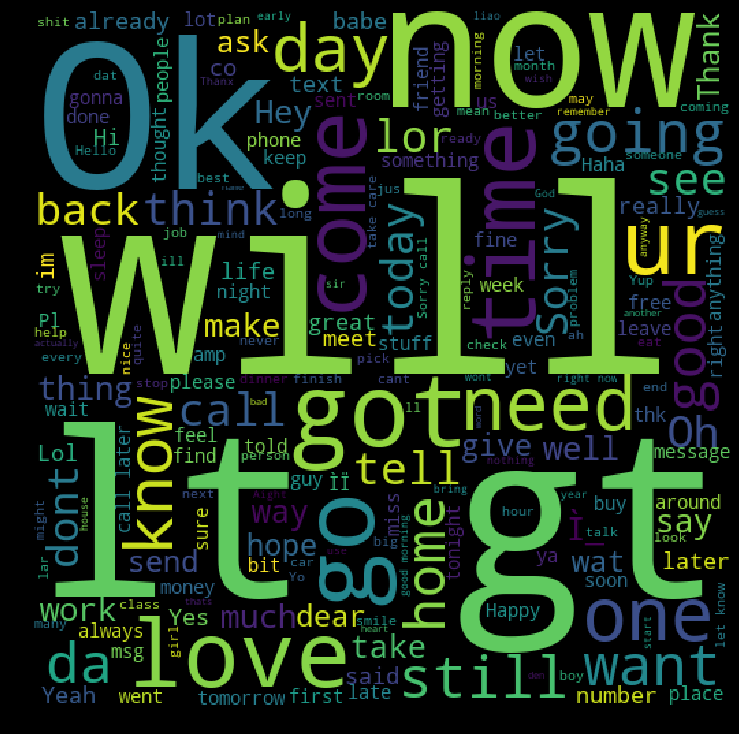

In [18]:
#visualizing data

spam_words = ' '.join(list(mails[mails['elabel']==1]['message']))

spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)

plt.figure(figsize = (10,10),facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


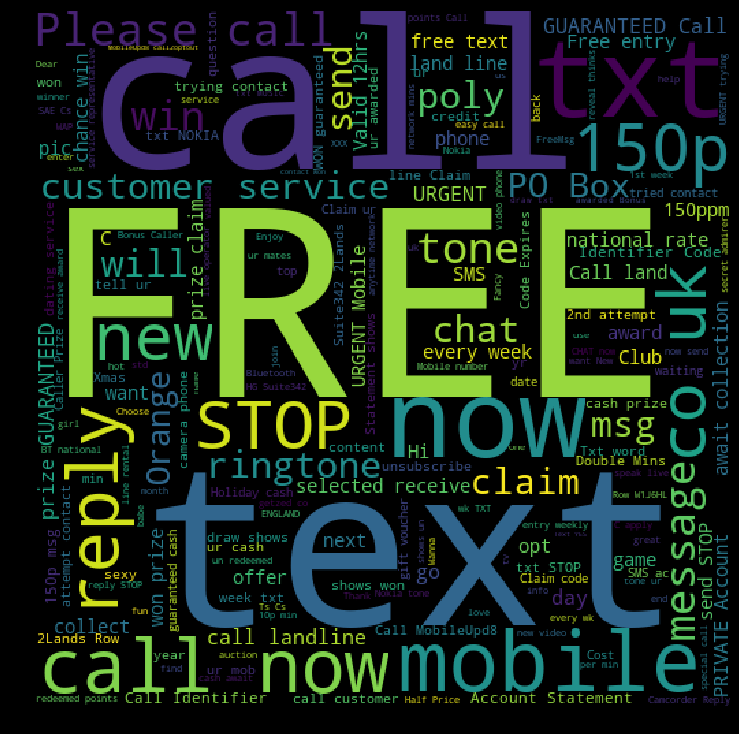

In [19]:
#visualizing data

spam_words = ' '.join(list(mails[mails['elabel']==0]['message']))

spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)

plt.figure(figsize = (10,10),facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


In [58]:
#vectorizers 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer


vectorizer = CountVectorizer()

X = vectorizer.fit_transform(trainData['message'].values)


# print(vectorizer.get_feature_names())
# print(X.toarray())

from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB()


clf.fit(X,trainData['label'].values)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
print(X.toarray()[0].shape)

Xtest = vectorizer.transform(testData['message'].values)

print(Xtest.toarray()[0].shape)

print('train score:',clf.score(X,trainData['label'].values))
print('test score:',clf.score(Xtest,testData['label'].values))




(7597,)
(7597,)
train score: 0.9931067268837651
test score: 0.9897435897435898


In [61]:
import pickle

f = open('spam_filter_model_1.pickle','wb')
f.write(pickle.dumps(clf))
f.close()


In [65]:
f = open('vect.pickle','wb')
f.write(pickle.dumps(vectorizer))
f.close()


In [62]:
loaded_clf = pickle.loads(open('spam_filter_model_1.pickle','rb').read())

In [63]:
print('test score:',loaded_clf.score(Xtest,testData['label'].values))


test score: 0.9897435897435898


In [22]:
#pedicting 

evl = vectorizer.transform(['dsddasd  d d s da d free sell dsad das.'])

clf.predict(evl)


array(['ham'], dtype='<U4')

In [23]:
print('predicted',clf.predict(X.toarray()[0].reshape(1,-1)))
print('true',trainData['label'][0])

print(vectorizer.inverse_transform(X.toarray()[0]))


predicted ['ham']
true ham
[array(['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'go',
       'got', 'great', 'in', 'jurong', 'la', 'only', 'point', 'there',
       'until', 'wat', 'world'], dtype='<U34')]


In [24]:
text = ['i have a product u will like to buy its free for 3 months']

vtext = vectorizer.fit_transform(text)

# clf.predict(vtext.toarray().reshape(1,-1))


vtext.toarray().shape



(1, 10)

In [46]:
#traning with tfifd vectorizer


vec = TfidfVectorizer()

data = vec.fit_transform(trainData['message'].values)

data.toarray().shape

(4207, 7597)

In [47]:
clf.fit(data.toarray(),trainData['label'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
clf.score(data.toarray(),trainData['label'].values)

0.9712384121701926

In [27]:
def predict_category(s, model= clf):
    s = vec.fit_transform(s)
    pred = model.predict(s.toarray().reshape(1,-1))
    return pred

#preprocessing the data

lowercase
tokenizer
strmming :- go ,goes,going replace by go
remove the stop words : - the,a,an ,is,to

options:use n-grams improve the accuracy

Optional: You can also use n-grams to improve the
accuracy. As of now, we only dealt with 1 word. 
But when two words are together the meaning totally
changes. For example, ‘good’ and ‘not good’ 
are opposite in meaning. Suppose a text contains 
‘not good’, it is better to consider ‘not good’ as one 
token rather than ‘not’ and ‘good’. 
Therefore, sometimes accuracy is improved when we split 
the text into tokens of two (or more) words than only word.
